# Non-linear Transformations Distributions
Investigate the probability distribution of f(x)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis as scipy_kurtosis

### Generate Sample of x

We sample from the gaussian 

In [2]:
size = 100000
sample = np.random.normal(size=size)

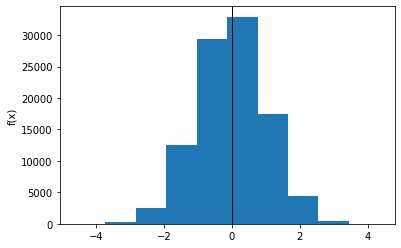

In [3]:
# Plot Histogram
ax = plt.hist(sample)
plt.ylabel('f(x)')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

### Transformation functions

##### Functions

In [4]:
concave_convex_fn = lambda x: np.abs(x)*x 

def logistic_fn(x):
    
    numerator = 1
    denominator = (1+ (1/np.exp(x)) ) 
    y = numerator/denominator
    
    return y

### Transform X

##### Concave Convex Transformation
This should Fatten the tails

In [5]:
x = sample
y = concave_convex_fn(sample)

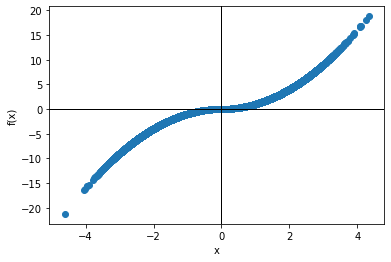

In [6]:
# Plot Mapping
ax = plt.scatter(x,y)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

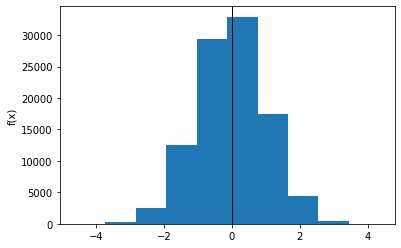

In [7]:
# Plot x Histogram
ax = plt.hist(x)
plt.ylabel('f(x)')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

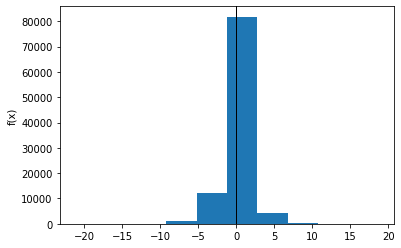

In [8]:
# Plot f(x) Histogram
ax = plt.hist(y)
plt.ylabel('f(x)')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

Notice that the kurtosis is much higher for f(x):

In [9]:
df = pd.DataFrame([x,y], index=['x','f(x)']).T

In [10]:
df.apply(scipy_kurtosis, **{'fisher':False}).to_frame().T.rename(index={0:'kurtosis'})

,x,f(x)
kurtosis,2.995473,11.759494


##### Convex Concave Transformation
Let's use the logistic function, this should thin the tails

In [11]:
convex_concave_fn = logistic_fn

In [12]:
x = sample
y = convex_concave_fn(sample)

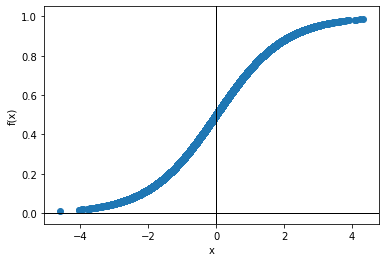

In [13]:
# Plot Mapping
ax = plt.scatter(x,y)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

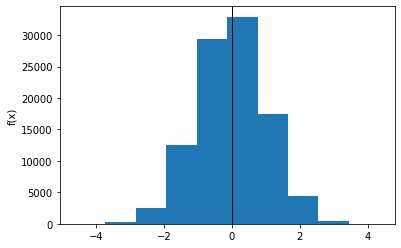

In [14]:
# Plot x Histogram
ax = plt.hist(x)
plt.ylabel('f(x)')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

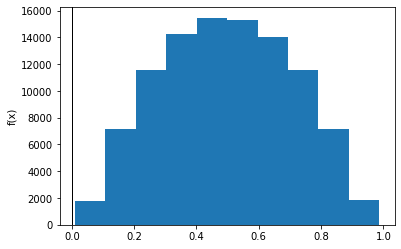

In [15]:
# Plot f(x) Histogram
ax = plt.hist(y)
plt.ylabel('f(x)')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

Kurtosis is reduced by the transformation:

In [16]:
df = pd.DataFrame([x,y], index=['x','f(x)']).T

df.apply(scipy_kurtosis, **{'fisher':False}).to_frame().T.rename(index={0:'kurtosis'})

,x,f(x)
kurtosis,2.995473,2.137234


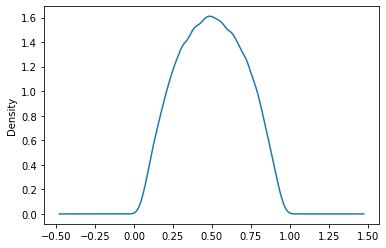

In [17]:
pd.Series(y).plot.kde()

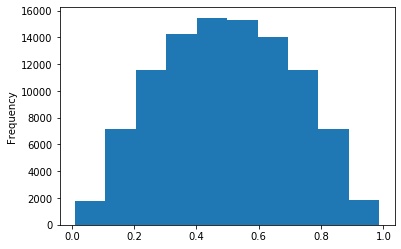

In [18]:
pd.Series(y).plot(kind='hist')

# Conclusions

* N shape thickens the tail as expected (concave-convex) 
* S shape thins out the tail (convex-concave)
    * Beware: depending on your choice of function the S shape can give you something bimodal (see Notebook 9)